<a href="https://colab.research.google.com/github/Andrey793/first_kaggle_project/blob/main/my_first_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pytorch_lightning torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 3.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manyl

In [1]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from tqdm import tqdm


In [2]:
import pandas as pd
import numpy as np

In [18]:
train_dat = pd.read_csv('/content/train.csv')
test_dat = pd.read_csv('/content/test.csv')
train_dat.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [ ]:
train_dat.shape , test_dat.shape

((990, 194), (594, 193))

In [19]:
X_train = train_dat.drop(columns=['species'])
y_train = train_dat['species']
X_val = test_dat

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [15]:
categories = [[*set(np.concatenate([np.array(y_train.unique()), np.array(y_test.unique())]))]]

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Кодирую через ohe для нейронки

In [17]:
enc = OneHotEncoder(categories=categories, sparse_output=False)
y_train = enc.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = enc.transform(np.array(y_test).reshape(-1, 1))

In [ ]:
#кодирую через ordinal encoder для бустинга

In [21]:
enc = OrdinalEncoder(categories=categories)
y_train = enc.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = enc.transform(np.array(y_test).reshape(-1, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.1 MB/s eta 0:00:00


In [9]:
from catboost import CatBoostClassifier

In [10]:
model = CatBoostClassifier(iterations = 7500, loss_function='MultiClass', task_type='GPU', classes_count=99, verbose=100)

In [11]:
model.fit(np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test)))

CatBoostError: /src/catboost/catboost/private/libs/target/data_providers.cpp:634: Currently only multi-regression, multilabel and survival objectives work with multidimensional target

In [23]:
from torchvision.transforms import v2

In [ ]:
#разместил классы по папкам для ImageFolder

In [ ]:
for i in range(X_train.shape[0]):
  new_path = '/content/images_classified/train/class' + str(int(y_train[i][0]))
  old_path = '/content/images/'
  if not os.path.isdir(new_path):
    os.mkdir(new_path)
  os.rename(old_path + str(np.array(X_train['id'])[i]) + '.jpg', new_path + '/' + str(np.array(X_train['id'])[i]) + '.jpg')

In [ ]:
for i in range(X_test.shape[0]):
  new_path = '/content/images_classified/test/class' + str(int(y_test[i][0]))
  old_path = '/content/images/'
  if not os.path.isdir(new_path):
    os.mkdir(new_path)
  os.rename(old_path + str(np.array(X_test['id'])[i]) + '.jpg', new_path + '/' + str(np.array(X_test['id'])[i]) + '.jpg')

In [24]:
preproc = v2.Compose([
    v2.PILToTensor(),
    v2.Resize(size=(224, 224)),
    v2.ToDtype(torch.float32, scale=True),  # to float32 in [0, 1]
])


train_dataset = ImageFolder('/content/images_classified/train', transform=preproc)
val_dataset = ImageFolder('/content/images_classified/test', transform=preproc)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)

In [25]:
NUM_CLASSES = 99

In [26]:
from torchvision.models import resnet18
from torchmetrics.functional import accuracy
device = 'cuda:0'

In [27]:
class YourModule(pl.LightningModule):
    def __init__(self, learning_rate=0.001, pretrained: bool = False) -> None:
        super().__init__()
        self.acc = 0
        self.pretrained = pretrained
        self.learning_rate = learning_rate
        self.add_l4 = False
        self.add_l3 = False
        self.add_l2 = False
        if pretrained:
            self.model = resnet18(weights='DEFAULT').to(device)
            for param in self.model.parameters():
              param.requires_grad = False
            self.model.fc = nn.Linear(self.model.fc.in_features, NUM_CLASSES)
            self.optimizer = torch.optim.Adam(self.model.fc.parameters(), lr=0.0001)
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        if self.pretrained:
            if self.acc > 0.85 and not self.add_l4:
              for param in self.model.layer4.parameters():
                param.requires_grad = True
              self.optimizer.add_param_group({'params' : list(self.model.layer4.parameters())})
              self.add_l4 = True
            if self.acc > 0.915 and not self.add_l3:
              for param in self.model.layer3.parameters():
                param.requires_grad = True
              self.optimizer.add_param_group({'params' : list(self.model.layer3.parameters())})
              self.add_l3 = True
            if self.acc > 0.94 and not self.add_l2:
              for param in self.model.layer2.parameters():
                param.requires_grad = True
              self.optimizer.add_param_group({'params' : list(self.model.layer2.parameters())})
              self.add_l2 = True
            preds = self.model(x)
        return preds

    def configure_optimizers(self):
        return self.optimizer

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        self.model.train()
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        self.model.eval()
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), task='multiclass', num_classes=NUM_CLASSES)
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", self.acc, prog_bar=True)

In [28]:
module = YourModule(pretrained=True)
module.model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
trainer = pl.Trainer( max_epochs=40, log_every_n_steps=10)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [30]:
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA GeForce RTX 3060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params | Mode 
---------------------------------------------------
0 | model | ResNet           | 11.2 M | train
1 | loss  | CrossEntropyLoss | 0      | train
---------------------------------------------------
50.8 K    Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.909    Total estimated model params size (MB)
69        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=40` reached.


In [ ]:
#Добавляю в текстовые данные предсказания по картинкам

In [31]:
module.model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [32]:
extra_train = np.zeros((X_train.shape[0], 2))
for i in range(X_train.shape[0]):
  extra_train[i][0] = np.array(X_train['id'])[i]
  path = '/content/images2/' + str(np.array(X_train['id'])[i]) + '.jpg'
  img = Image.open(path).convert('RGB')
  img = preproc(img)
  img.unsqueeze_(0)
  extra_train[i][1] = torch.argmax(module.model(img).data)

In [33]:
extra_train = pd.DataFrame(extra_train)
extra_train[0] = extra_train[0].astype(int)
extra_train.rename(columns={0 : 'id'}, inplace=True)
extra_train

,id,1
0,1042,67.0
1,789,94.0
2,1268,47.0
3,900,87.0
4,280,1.0
...,...,...
737,823,84.0
738,1041,13.0
739,898,31.0
740,334,44.0


In [34]:
X_train_full = pd.merge(X_train, extra_train, on='id')

In [35]:
extra_test = np.zeros((X_test.shape[0], 2))
for i in range(X_test.shape[0]):
  extra_test[i][0] = np.array(X_test['id'])[i]
  path = '/content/images2/' + str(np.array(X_test['id'])[i]) + '.jpg'
  img = Image.open(path).convert('RGB')
  img = preproc(img)
  img.unsqueeze_(0)
  extra_test[i][1] = torch.argmax(module.model(img).data)

In [36]:
extra_test = pd.DataFrame(extra_test)
extra_test[0] = extra_test[0].astype(int)
extra_test.rename(columns={0 : 'id'}, inplace=True)
extra_test

,id,1
0,461,41.0
1,1231,68.0
2,331,36.0
3,398,33.0
4,865,73.0
...,...,...
243,1163,53.0
244,80,69.0
245,1502,39.0
246,87,20.0


In [37]:
X_test_full = pd.merge(X_test, extra_test, on='id')

In [38]:
X_test_full

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64,1
0,461,0.000000,0.001953,0.027344,0.013672,0.021484,0.007812,0.009766,0.0,0.017578,...,0.000000,0.000000,0.051758,0.001953,0.034180,0.0,0.043945,0.010742,0.000000,41.0
1,1231,0.001953,0.003906,0.046875,0.003906,0.017578,0.005859,0.027344,0.0,0.003906,...,0.000000,0.032227,0.000000,0.020508,0.000000,0.0,0.000000,0.004883,0.001953,68.0
2,331,0.007812,0.019531,0.083984,0.015625,0.001953,0.017578,0.000000,0.0,0.050781,...,0.042969,0.002930,0.002930,0.021484,0.000000,0.0,0.027344,0.000000,0.008789,36.0
3,398,0.056641,0.091797,0.007812,0.005859,0.001953,0.091797,0.076172,0.0,0.000000,...,0.000000,0.002930,0.000977,0.028320,0.000000,0.0,0.001953,0.000000,0.013672,33.0
4,865,0.003906,0.001953,0.021484,0.001953,0.013672,0.000000,0.000000,0.0,0.011719,...,0.000000,0.000000,0.007812,0.007812,0.000000,0.0,0.048828,0.008789,0.006836,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1163,0.041016,0.074219,0.029297,0.021484,0.005859,0.066406,0.017578,0.0,0.003906,...,0.003906,0.003906,0.033203,0.022461,0.001953,0.0,0.049805,0.005859,0.001953,53.0
244,80,0.000000,0.001953,0.001953,0.005859,0.035156,0.000000,0.003906,0.0,0.013672,...,0.000000,0.012695,0.001953,0.033203,0.000000,0.0,0.000000,0.022461,0.025391,69.0
245,1502,0.001953,0.003906,0.015625,0.025391,0.005859,0.000000,0.013672,0.0,0.005859,...,0.000000,0.003906,0.000977,0.021484,0.000000,0.0,0.021484,0.003906,0.043945,39.0
246,87,0.001953,0.001953,0.093750,0.017578,0.009766,0.046875,0.013672,0.0,0.005859,...,0.000000,0.002930,0.072266,0.007812,0.100590,0.0,0.058594,0.005859,0.000000,20.0


In [39]:
X_train_full = X_train_full.drop(columns='id')
X_test_full.drop(columns='id', inplace=True)

In [40]:
X_train_full.rename(str, axis='columns', inplace=True)
X_test_full.rename(str, axis='columns', inplace=True)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)

In [ ]:
model = CatBoostClassifier(iterations = 10000, loss_function='MultiClass', od_type='IncToDec', use_best_model=True, task_type='GPU', classes_count=99, verbose=100)

In [ ]:
model.fit(X_train_full, y_train, eval_set=(X_test_full, y_test))

Learning rate set to 0.037303
0:	learn: 4.5543529	test: 4.5621328	best: 4.5621328 (0)	total: 99.9ms	remaining: 16m 39s
100:	learn: 1.6750750	test: 2.0511097	best: 2.0511097 (100)	total: 7.07s	remaining: 11m 32s
200:	learn: 0.6631962	test: 1.0775196	best: 1.0775196 (200)	total: 14.3s	remaining: 11m 37s
300:	learn: 0.3389287	test: 0.7036052	best: 0.7036052 (300)	total: 21.5s	remaining: 11m 34s
400:	learn: 0.2162823	test: 0.5375030	best: 0.5375030 (400)	total: 28.4s	remaining: 11m 20s
500:	learn: 0.1534094	test: 0.4427667	best: 0.4427667 (500)	total: 35.4s	remaining: 11m 10s
600:	learn: 0.1164948	test: 0.3812304	best: 0.3812304 (600)	total: 42.3s	remaining: 11m 1s
700:	learn: 0.0922610	test: 0.3362507	best: 0.3362507 (700)	total: 49.3s	remaining: 10m 54s
800:	learn: 0.0758587	test: 0.3036469	best: 0.3036469 (800)	total: 56.4s	remaining: 10m 48s
900:	learn: 0.0646444	test: 0.2802333	best: 0.2802333 (900)	total: 1m 3s	remaining: 10m 39s
1000:	learn: 0.0560249	test: 0.2612169	best: 0.2612169

In [ ]:
#Пробую нейронку вместо бустинга

In [ ]:
y_train

<742x99 sparse matrix of type '<class 'numpy.float64'>'
	with 742 stored elements in Compressed Sparse Row format>

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Dense(units=135, activation="relu", input_shape=(X_train_full.shape[-1],) ),
        keras.layers.Dropout(0.35),
        keras.layers.Dense(units=135, activation="relu"),
        keras.layers.Dense(units=NUM_CLASSES, activation="softmax"),
    ]
)

initial_weights = model.get_weights()

In [ ]:
learning_rate = 0.001

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate /2 ),
              loss="categorical_crossentropy",
              metrics='accuracy'
             )

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 135)               26190     
                                                                 
 dropout_2 (Dropout)         (None, 135)               0         
                                                                 
 dense_7 (Dense)             (None, 135)               18360     
                                                                 
 dense_8 (Dense)             (None, 99)                13464     
                                                                 
Total params: 58014 (226.62 KB)
Trainable params: 58014 (226.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.0002, # minimium amount of change to count as an improvement
    patience  = 20,     # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [ ]:
history = model.fit(X_train_full, y_train,
          epochs=500,
          batch_size=50,
          validation_data=(X_test_full, y_test),
          verbose=0,
          callbacks=early_stopping
          )

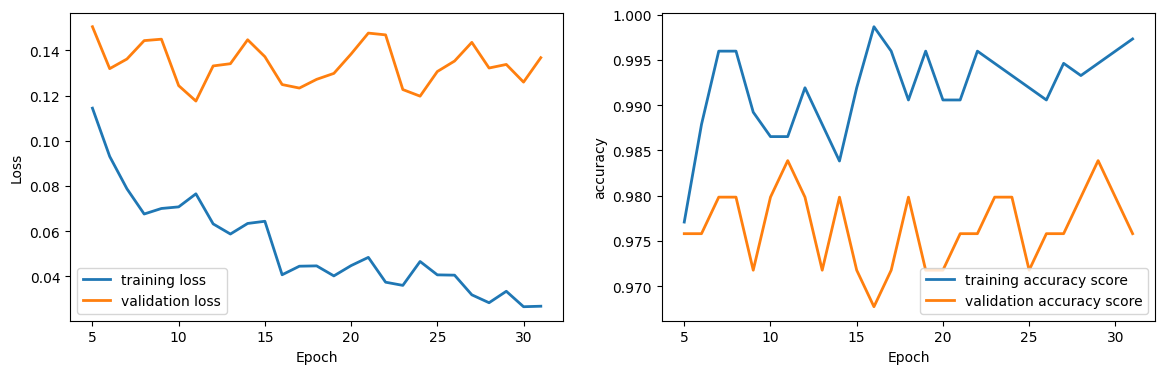

In [ ]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"accuracy"], lw=2, label='training accuracy score')
plt.plot(logs.loc[5:,"val_accuracy"], lw=2, label='validation accuracy score')
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend(loc='lower right')
plt.show()


In [42]:
#пробую TabNet вместо бустинга

In [43]:
!pip install pytorch_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 431.0 kB/s eta 0:00:00


In [54]:
y_test.shape

(248, 1)

In [74]:
from pytorch_tabnet.tab_model import TabNetClassifier

clf= TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       scheduler_params={"step_size":10,
                                         "gamma":0.8},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                      )


clf.fit(
    X_train_full ,y_train.reshape(742),
    eval_set=[(X_train_full, y_train.reshape(742)), (X_test_full, y_test.reshape(248))],
    eval_name=['train', 'test'],
    eval_metric=['accuracy','logloss'],
    max_epochs=200, patience=30,
    batch_size=32,
    num_workers=0,
    weights=1,
    drop_last=False
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.02248 | train_accuracy: 0.01617 | train_logloss: 4.67408 | test_accuracy: 0.00403 | test_logloss: 4.70234 |  0:00:01s
epoch 1  | loss: 4.64676 | train_accuracy: 0.02022 | train_logloss: 4.57324 | test_accuracy: 0.02016 | test_logloss: 4.55558 |  0:00:02s
epoch 2  | loss: 4.5038  | train_accuracy: 0.031   | train_logloss: 4.44739 | test_accuracy: 0.02419 | test_logloss: 4.4446  |  0:00:03s
epoch 3  | loss: 4.3755  | train_accuracy: 0.04987 | train_logloss: 4.36138 | test_accuracy: 0.04839 | test_logloss: 4.32085 |  0:00:04s
epoch 4  | loss: 4.27816 | train_accuracy: 0.06199 | train_logloss: 4.31262 | test_accuracy: 0.06452 | test_logloss: 4.35057 |  0:00:06s
epoch 5  | loss: 4.13119 | train_accuracy: 0.06604 | train_logloss: 4.07795 | test_accuracy: 0.06048 | test_logloss: 4.00072 |  0:00:07s
epoch 6  | loss: 3.80765 | train_accuracy: 0.1186  | train_logloss: 3.65112 | test_accuracy: 0.10081 | test_logloss: 3.64305 |  0:00:08s
epoch 7  | loss: 3.54448 | train_accuracy

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [56]:
extra_val = np.zeros((X_val.shape[0], 2))
for i in range(X_val.shape[0]):
  extra_val[i][0] = np.array(X_val['id'])[i]
  path = '/content/images2/' + str(np.array(X_train['id'])[i]) + '.jpg'
  img = Image.open(path).convert('RGB')
  img = preproc(img)
  img.unsqueeze_(0)
  extra_val[i][1] = torch.argmax(module.model(img).data)

In [57]:
extra_val = pd.DataFrame(extra_val)
extra_val[0] = extra_val[0].astype(int)
extra_val.rename(columns={0 : 'id'}, inplace=True)
X_val_full = pd.merge(X_val, extra_val, on='id')

In [ ]:
#Заполняю ответы

In [58]:
submission = np.zeros((X_val_full.shape[0], NUM_CLASSES + 1))
for i in range(X_val_full.shape[0]):
  submission[i][0] = np.array(X_val_full['id'])[i]

In [59]:
X_val_full.drop(columns='id', inplace=True)
X_val_full.rename(str, axis='columns', inplace=True)
X_val_full = scaler.transform(X_val_full)

In [64]:
big_prediction = clf.predict_proba(X_val_full)

In [66]:
for i in range(X_val_full.shape[0]):
  pred = big_prediction[i]
  submission[i][1:] = pred

In [67]:
sample = pd.read_csv('/content/sample_submission.csv')
columns = sample.columns

In [68]:
submission = pd.DataFrame(submission, columns=columns)

In [69]:
submission['id'] = submission['id'].astype(int)

In [70]:
submission

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,3.737934e-20,1.530502e-28,5.029933e-15,1.809209e-13,9.744723e-16,1.947546e-14,2.233997e-14,5.250733e-02,2.633594e-05,...,1.312228e-06,3.001686e-17,5.503328e-16,1.618568e-06,3.010589e-14,5.352441e-21,5.687651e-22,1.056785e-13,3.972806e-05,2.086953e-07
1,7,7.808015e-09,5.919778e-09,1.160216e-07,4.220977e-02,9.058788e-12,7.969543e-03,5.448004e-09,3.626737e-13,6.877681e-09,...,5.866805e-04,1.149117e-06,1.190451e-07,1.210551e-06,8.186378e-10,9.057974e-05,3.332126e-10,1.141716e-04,4.978113e-05,6.501527e-10
2,9,4.287379e-20,1.376523e-14,4.278418e-12,4.545976e-09,2.986441e-16,2.011254e-07,2.028033e-08,4.641275e-08,6.867064e-10,...,1.763934e-06,1.256542e-13,8.138666e-17,1.236057e-08,2.488184e-12,6.237745e-08,2.464296e-11,5.268807e-10,6.394270e-09,1.185933e-07
3,12,6.112642e-29,8.783954e-07,3.131037e-14,5.207299e-15,3.178291e-31,7.926354e-05,3.358386e-19,1.685914e-21,3.789037e-26,...,2.713156e-18,1.465906e-08,2.323746e-29,2.240645e-25,2.723812e-29,1.793871e-11,1.080918e-23,1.183509e-09,7.817872e-26,1.779508e-18
4,13,2.223526e-18,3.645924e-08,5.891562e-07,1.243791e-07,1.294699e-15,1.912732e-09,1.054587e-10,5.123376e-13,1.645102e-09,...,1.823372e-06,4.715814e-25,1.590637e-08,1.460096e-06,4.517357e-16,2.875219e-10,5.307723e-08,1.029794e-14,3.418179e-03,1.095304e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,6.348617e-21,8.804190e-12,1.433736e-10,1.388330e-09,2.571270e-17,6.785087e-06,5.664269e-09,9.145391e-10,1.014942e-11,...,6.593972e-08,1.133973e-13,4.257345e-17,6.851214e-10,1.457740e-14,1.952583e-08,1.009394e-11,3.539311e-10,3.166270e-10,1.933220e-08
590,1577,5.155829e-25,8.796630e-14,3.742351e-11,1.407943e-21,4.691641e-26,1.215903e-18,1.902843e-15,1.672949e-11,3.088661e-18,...,5.465208e-16,1.605187e-11,2.973936e-29,3.144171e-22,9.418959e-17,8.619362e-15,6.887631e-20,1.859395e-07,1.411455e-20,2.571273e-07
591,1579,8.497752e-17,6.653941e-20,3.530586e-17,3.129032e-19,2.059738e-13,3.163052e-10,1.185382e-03,1.749642e-12,1.343614e-09,...,5.442808e-16,9.278448e-13,5.847613e-25,5.214490e-11,2.713156e-07,1.082993e-12,9.162095e-10,8.385891e-11,1.118015e-15,2.747829e-05
592,1580,2.815529e-07,3.316591e-08,4.699972e-05,7.126098e-07,4.982380e-17,1.062055e-21,1.802688e-18,3.833362e-18,2.660059e-13,...,1.028944e-05,3.229776e-14,4.571025e-06,1.486260e-14,1.390672e-09,4.904242e-08,1.132843e-12,1.839111e-05,1.689808e-05,6.185432e-14


In [71]:
submission.to_csv('/content/my_submission.csv', index=False)